In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split 

Описание данных: 

*gender* - пол

*age*  - возраст

*hypertension* - страдает ли пациент гипертонией

*heart_disease* - есть ли болезни сердца

*ever_married* - был ли женат/замужем

*work_type*  - тип работы

*Residence_type* - проживает в городе или селе

*avg_glucose_level* - средний уровень глюкозы

*bmi* - индекс массы тела

*smoking_status* - информация о курении

*stroke* - целевая переменная инсульт был или нет 

In [ ]:
df = pd.read_csv('stroke_data.csv')
print(df.shape)
df.head()

(4000, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,73,0,0,1,Private,1,143.509078,29.160236,formerly smoked,1
1,Female,49,0,0,1,Private,0,85.230000,25.400000,Unknown,0
2,Male,58,0,0,1,Private,0,197.174377,34.870606,formerly smoked,1
3,Female,69,0,0,1,Self-employed,1,99.680000,17.600000,formerly smoked,0
4,Male,60,0,0,1,Private,0,69.200000,30.900000,never smoked,0


In [ ]:
df.stroke.value_counts()

0    2027
1    1973
Name: stroke, dtype: int64

In [ ]:
df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

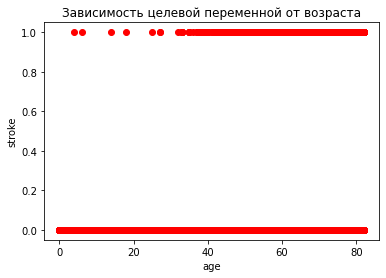

In [ ]:
plt.plot(df['age'], df.stroke, 'ro') 
plt.xlabel('age')
plt.ylabel('stroke')
plt.title('Зависимость целевой переменной от возраста')
plt.show()

In [ ]:
x = df.drop(['stroke'], axis=1)
y = df.stroke

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
logreg = LogisticRegression()

In [ ]:
train_cols = ['age']
logreg.fit(train_x[train_cols], train_y)

LogisticRegression()

In [ ]:
pred = logreg.predict(test_x[train_cols])
accuracy_score(test_y, pred)

0.7683333333333333

In [ ]:
confusion_matrix(test_y, pred)

array([[448, 156],
       [122, 474]])

In [ ]:
train_cols = ['age', 'heart_disease']
logreg.fit(train_x[train_cols], train_y)

LogisticRegression()

In [ ]:
pred = logreg.predict(test_x[train_cols])
print(accuracy_score(test_y, pred))
confusion_matrix(test_y, pred)

0.785


array([[457, 147],
       [111, 485]])

In [ ]:
logreg.predict_proba(test_x[train_cols])

array([[0.85219662, 0.14780338],
       [0.97878403, 0.02121597],
       [0.83988949, 0.16011051],
       ...,
       [0.94222814, 0.05777186],
       [0.99426236, 0.00573764],
       [0.9923954 , 0.0076046 ]])

In [ ]:
logreg.coef_

array([[ 0.0945283 , -1.22020129]])

In [ ]:
for col, i in zip(train_cols, logreg.coef_[0]):
    print(f'Коэф при колонке {col}={i}')

Коэф при колонке age=0.094528302288334
Коэф при колонке heart_disease=-1.220201286919679


In [ ]:
logreg.intercept_

array([-5.43853816])

In [ ]:
logreg.score(train_x[train_cols], train_y)

0.7725

In [ ]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
logreg_tuned = LogisticRegression(penalty='l1', solver='saga')
logreg_tuned.fit(train_x[train_cols], train_y)

/Users/semki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(penalty='l1', solver='saga')

In [ ]:
pred2 = logreg_tuned.predict(test_x[train_cols])
print(accuracy_score(test_y, pred2))
confusion_matrix(test_y, pred2)

0.7858333333333334


array([[429, 175],
       [ 82, 514]])

In [ ]:
for col, i in zip(train_cols, logreg_tuned.coef_[0]):
    print(f'Коэф при колонке {col}={i}')

Коэф при колонке age=0.0646681587054096
Коэф при колонке heart_disease=-0.5179581796112315
